In [1]:
%matplotlib inline
import requests
import pandas as pd

import os
import sys
path = os.path.abspath('../')
sys.path.append(path)

In [2]:
from cgsn_parsers.parsers.parse_adcp import Parser

In [3]:
# Coastal Endurance Oregon Shelf Surface Mooring NSIF (7 meters) ADCPT
baseurl = "https://rawdata.oceanobservatories.org/files/CE02SHSM/D00003/cg_data/dcl26/adcpt/"
fname = "20160518.adcpt.log"

In [4]:
# initialize the Parser object for PHSEN
adcp = Parser(baseurl + fname)

In [5]:
r = requests.get(adcp.infile, verify=True) # use verify=False for expired certificate
adcp.raw = r.content

In [6]:
len(adcp.raw), adcp.raw[:1000]

(236448,
 b'2016/05/18 00:00:02.662 [adcpt:DLOGP2]:Battery power on message\n2016/05/18 00:02:51.929 7F7F8004000612004D008E002002EA02B403000032284B41003504323C006400580001400500D0070003001F000000007D1DD200770001053200180037000006F5E464090000FF002E4700001480000C0010051200000000000000D4054600FD20B0FFB10921005D04000005124002848C69FFFF6782A000000088B21500000000000000000014100512000000000001CEFF8EFD37001900CCFF88FD40002800EFFF8EFD3A000A000C0096FD38001100FDFF9FFD2E0013001800BDFD290014002200B7FE580071FF3E0025FF640096FF480043FE1E0043002B004DFE39000E00310064FE4E002D001D0034FE2F00EFFF2C003EFE2F00F8FF370030FE2F00F5FF30002DFE3700FEFF280026FE3600F7FF330032FE3D00FAFF0B0019FE3400F0FF170005FE2700F6FFFBFF09FE26000700010022FE25000000FBFF18FE1900FDFFF4FF2EFE14000900F1FF5AFE1F00FDFFFDFF70FE1F00FFFF06007CFE1F001800050086FE210005000400A9FE3000F3FF1B0098FE3500F2FF08009FFE3600F9FFEAFF89FE3700EFFFE3FF88FE3800E7FFDCFF87FE3500EEFFD4FF73FE27000400D8FF79FE24001800D2FF83FE21000D00E4FF81FE1A001400F9FFB1FE23001400EEF

In [7]:
adcp.parse_data()

In [8]:
adcp.data.keys()

dict_keys(['velocity', 'correlation', 'echo', 'percent', 'header', 'variable', 'time', 'fixed'])

In [36]:
hd = pd.DataFrame(adcp.data.header.toDict())
hd['dt_utc'] = pd.to_datetime(adcp.data.time, unit='s')
hd.set_index('dt_utc', drop=True, inplace=True)

fx = pd.DataFrame(adcp.data.fixed.toDict())
fx['dt_utc'] = pd.to_datetime(adcp.data.time, unit='s')
fx.set_index('dt_utc', drop=True, inplace=True)

vbl = pd.DataFrame(adcp.data.variable.toDict())
vbl['dt_utc'] = pd.to_datetime(adcp.data.time, unit='s')
vbl.set_index('dt_utc', drop=True, inplace=True)

vel = pd.DataFrame(adcp.data.velocity.toDict())
vel['dt_utc'] = pd.to_datetime(adcp.data.time, unit='s')
vel.set_index('dt_utc', drop=True, inplace=True)

cor = pd.DataFrame(adcp.data.correlation.toDict())
cor['dt_utc'] = pd.to_datetime(adcp.data.time, unit='s')
cor.set_index('dt_utc', drop=True, inplace=True)

echo = pd.DataFrame(adcp.data.echo.toDict())
echo['dt_utc'] = pd.to_datetime(adcp.data.time, unit='s')
echo.set_index('dt_utc', drop=True, inplace=True)

per = pd.DataFrame(adcp.data.percent.toDict())
per['dt_utc'] = pd.to_datetime(adcp.data.time, unit='s')
per.set_index('dt_utc', drop=True, inplace=True)

df = pd.concat([hd, fx, vbl, vel, cor, echo, per], axis=1)

In [37]:
# Later, can drop time, and maybe dt_utc (not the index)
df.shape, df.columns

((96, 116),
 Index(['num_bytes', 'num_data_types', 'beam_angle', 'bin_1_distance',
        'blank_after_transmit', 'coord_transform_beams',
        'coord_transform_mapping', 'coord_transform_tilts',
        'coord_transform_type', 'data_flag',
        ...
        'magnitude_beam3', 'magnitude_beam4', 'intensity_beam1',
        'intensity_beam2', 'intensity_beam3', 'intensity_beam4', 'bad_beams',
        'good_3beam', 'good_4beam', 'transforms_reject'],
       dtype='object', length=116))

In [38]:
df.dtypes

num_bytes                         int64
num_data_types                    int64
beam_angle                        int64
bin_1_distance                    int64
blank_after_transmit              int64
coord_transform_beams             int64
coord_transform_mapping           int64
coord_transform_tilts             int64
coord_transform_type              int64
data_flag                         int64
depth_cell_length                 int64
error_vel_threshold               int64
false_target_threshold            int64
firmware_revision                 int64
firmware_version                  int64
heading_alignment                 int64
heading_bias                      int64
lag_length                        int64
low_corr_threshold                int64
num_beams                         int64
num_cells                         int64
num_code_repetitions              int64
percent_good_min                  int64
pings_per_ensemble                int64
reference_layer_start             int64


In [40]:
# extract a specific velocity bin from the eastward and northward velocities
df['east_01'] = [x[0] for x in df['eastward']]
df['east_05'] = [x[4] for x in df['eastward']]
df['east_15'] = [x[14] for x in df['eastward']]

df['north_01'] = [x[0] for x in df['northward']]
df['north_05'] = [x[4] for x in df['northward']]
df['north_15'] = [x[14] for x in df['northward']]


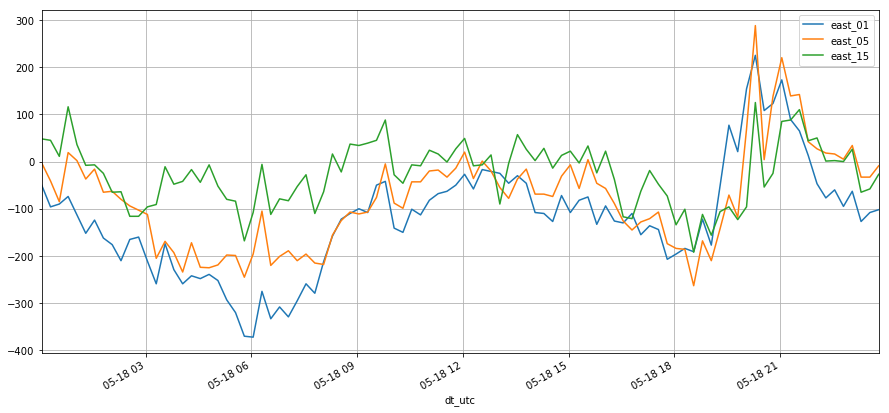

In [43]:
df[['east_01', 'east_05', 'east_15']].plot(figsize=(15,7), grid='on');

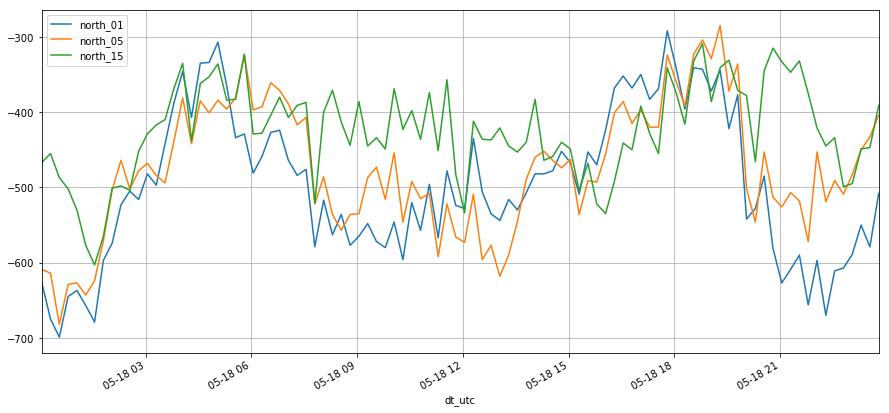

In [44]:
df[['north_01', 'north_05', 'north_15']].plot(figsize=(15,7), grid='on');